In [10]:

import pandas as pd
import numpy as np

# Use this for plotting QQ plot
import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('../Datasets/train.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [13]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
transformer = ColumnTransformer([('trf1',SimpleImputer(),['Age'])],remainder='passthrough')

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test) 

In [17]:
X_train = pd.DataFrame(columns=X.columns,data=X_train)
X_test = pd.DataFrame(columns=X.columns,data=X_test)

In [18]:
X_train

,Age,Fare
0,45.500000,28.5000
1,23.000000,13.0000
2,32.000000,7.9250
3,26.000000,7.8542
4,6.000000,31.2750
...,...,...
707,21.000000,7.6500
708,29.498846,31.0000
709,41.000000,14.1083
710,14.000000,120.0000


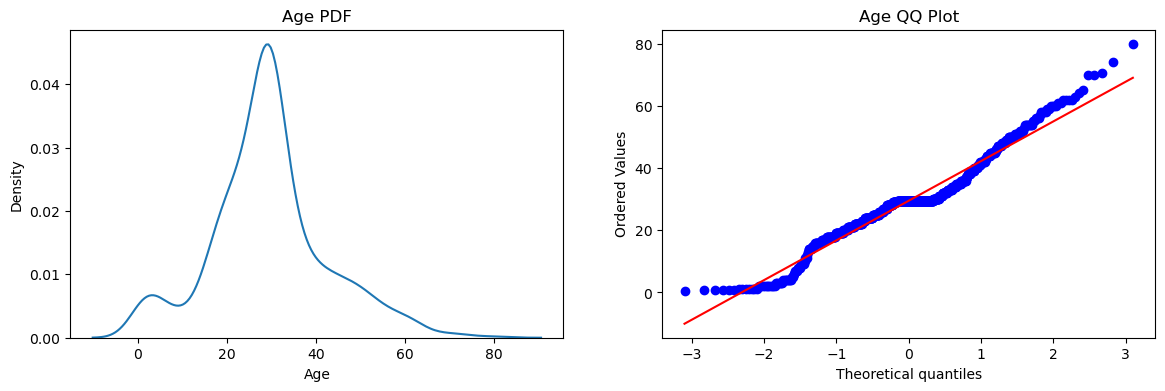

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122) 
stats.probplot(X_train['Age'], dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show()

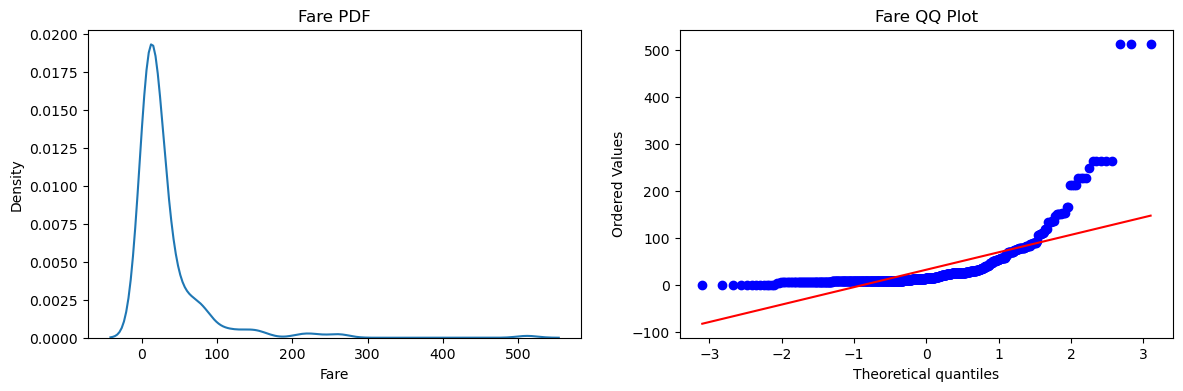

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(X_train['Fare'])
plt.title("Fare PDF")

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [22]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [23]:
func_trf = FunctionTransformer(func=np.log1p)
std = StandardScaler()
pipe = Pipeline([('func_trf',func_trf),('std',std)])

In [24]:
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [25]:
X_train_transformed = pd.DataFrame(columns = X.columns, data = X_train_transformed)
X_test_transformed = pd.DataFrame(columns = X.columns, data = X_test_transformed)


In [26]:
X_test_transformed

,Age,Fare
0,0.218648,-0.171163
1,0.293834,-0.523606
2,-0.365300,-0.782201
3,-2.084459,0.582232
4,-0.891827,-0.459847
...,...,...
174,-0.606522,-0.878002
175,0.218648,-0.865523
176,0.603401,0.532666
177,-0.606522,-0.523606


In [27]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


In [28]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
X_transformed = pipe.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6577278401997504


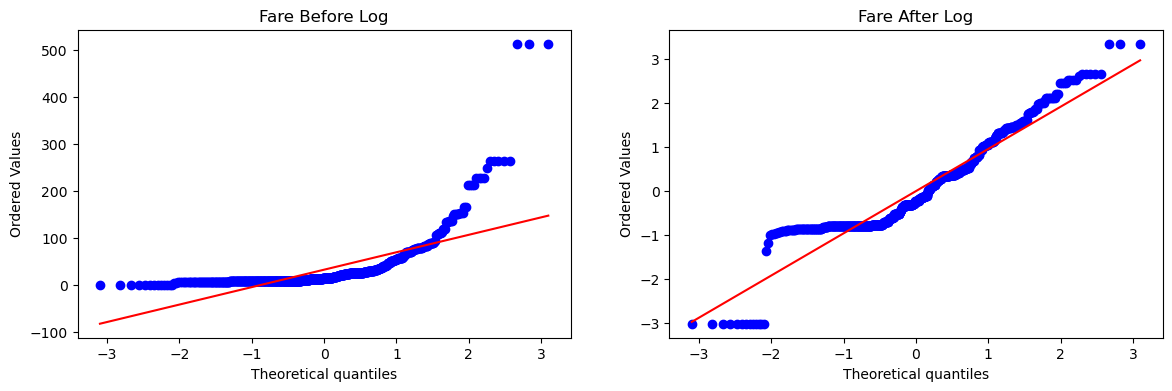

In [29]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

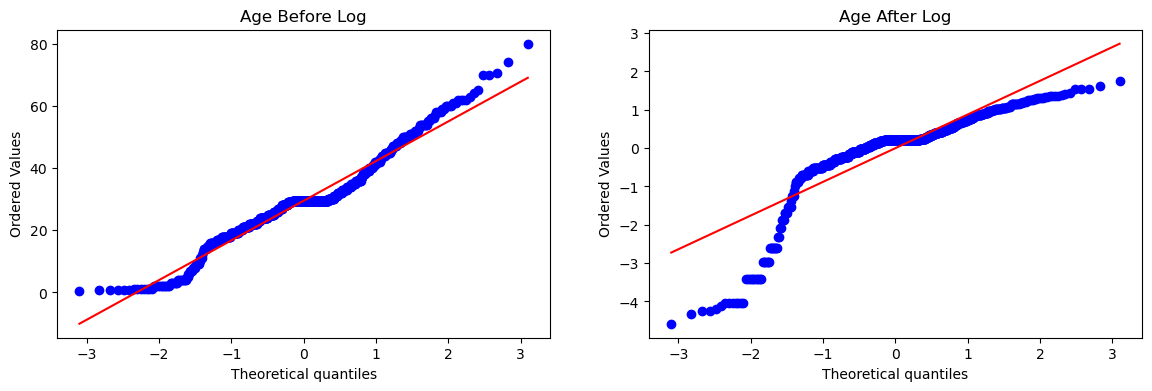

In [30]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [31]:
trf2 = ColumnTransformer([('log',func_trf,[1])],remainder='passthrough')
trf3 = ColumnTransformer([('Standardization',std,[0,1])],remainder='passthrough')
pipe2 = Pipeline([('trf2',trf2),('std',trf3)])
X_train_transformed2 = pipe2.fit_transform(X_train)
X_test_transformed2 = pipe2.transform(X_test)

In [32]:
X_train_transformed2 = pd.DataFrame(columns=X.columns,data = X_train_transformed)
X_test_transformed2 = pd.DataFrame(columns=X.columns,data = X_test_transformed)

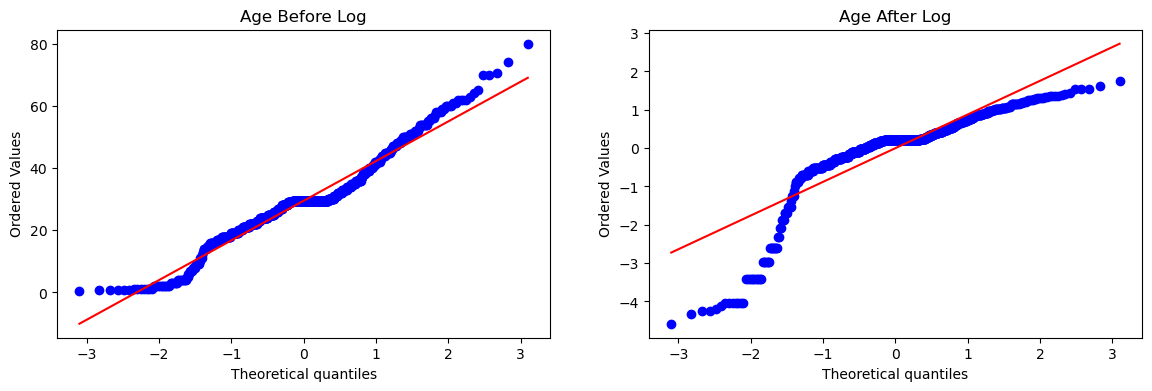

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed2['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [34]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [35]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577278401997504


In [36]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

In [ ]:
apply_transform(lambda x : np.log1p(x))